# bank-full

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn import preprocessing
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
#Import data
df=pd.read_csv('D:/ExcelR/Assignments/Downloaded/Logistic Regression/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df['job']=df['job'].astype('category')  
df['marital']=df['marital'].astype('category') 
df['education']=df['education'].astype('category') 
df['default']=df['default'].astype('category') 
df['housing']=df['housing'].astype('category') 
df['loan']=df['loan'].astype('category') 
df['contact']=df['contact'].astype('category') 
df['month']=df['month'].astype('category') 
df['poutcome']=df['poutcome'].astype('category') 
df['y']=df['y'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [6]:
df=pd.get_dummies(df,columns=['job'])
df=pd.get_dummies(df,columns=['marital'])
df=pd.get_dummies(df,columns=['education'])
df=pd.get_dummies(df,columns=['default'])
df=pd.get_dummies(df,columns=['housing'])
df=pd.get_dummies(df,columns=['loan'])
df=pd.get_dummies(df,columns=['contact'])
df=pd.get_dummies(df,columns=['month'])
df=pd.get_dummies(df,columns=['poutcome'])
df=pd.get_dummies(df,columns=['y'])

In [7]:
# Dividing our data into input and output variables 
X = df.iloc[:,:15]
Y = df.iloc[:,16]

In [8]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
classifier.coef_

array([[ 6.46346273e-03, -2.25242039e-05,  4.06631312e-02,
         3.16557748e-04,  1.52772722e-02, -5.89182679e-03,
         5.78384638e-01, -3.96041208e+00, -7.20585800e+00,
        -1.05924811e+00, -7.95687009e-01, -6.93694244e+00,
        -8.81649918e-01, -1.17824158e+00, -3.23633167e+00]])

In [10]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [11]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [12]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [13]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,0,0
45208,0,1
45209,0,0


In [14]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[36201  1413]
 [ 4441  3156]]


predicted value is 1 and in 3215 cases actual are there > actual value and predicted value is 0 in 36193 cases

In [15]:
accuracy=((36201+3156)/(36201+1413+4441+3156))*100
accuracy

87.05182367123045

###### ---We got 87.05 percentage accuracy for this logistic regression model

In [16]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     37614
           1       0.69      0.42      0.52      7597

    accuracy                           0.87     45211
   macro avg       0.79      0.69      0.72     45211
weighted avg       0.86      0.87      0.86     45211



Text(0, 0.5, 'True Positive Rate')

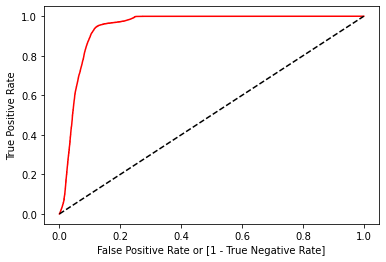

In [17]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [18]:
auc

0.6889306711624568

In [20]:
import statsmodels.api as sm

In [21]:
logit = sm.Logit(y_pred,X)
logit

In [22]:
logit.fit().summary()

D:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
D:\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 14


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Mon, 14 Jun 2021   Pseudo R-squ.:                     inf
Time:                        16:42:32   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.1136      0.002    -45.518      0.000      -0.118      -0.109
balance              -0.0003   1.61e-05    -16.497      0.000      -0.000      -0.000
day                   0.2308      0.005     48.556      0.000       0.222       0.240
duration              0.0008      0.000      7.510      0.000       0.001       0.001
campaign              0.0425      0.010      4.253      0.000       0.023       0.062
pdays                -0.0538      0.002    -29.310      0.000      -0.057      -0.050
previous              4.9968      0.152     32.772      0.000       4.698       5.296
job_admin.          -33.6958      1.173    -28.736      0.000     -35.994     -31.398
job_blue-collar     -64.3691      2.236    -28.792      0.000     -68.751     -59.987
job_entrepreneur     -8.3943      0.498    -16.866      0.000      -9.370      -7.419
job_housemaid        -6.2847      0.369    -17.032      0.000      -7.008      -5.561
job_management      -60.1452      2.084    -28.866      0.000     -64.229     -56.061
job_retired          -3.7051      0.223    -16.592      0.000      -4.143      -3.267
job_self-employed   -10.4690      0.541    -19.365      0.000     -11.529      -9.409
job_services        -28.5013      1.104    -25.808      0.000     -30.666     -26.337
=====================================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

--No insignificant values.